## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

In [219]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get data

In [220]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [221]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [222]:
!ls -l data

total 16656
-rw-r--r-- 1 vtec vtec 17051982 Oct 11 19:17 mnist.pkl.gz


In [223]:
with gzip.open(path_gz, 'rb') as f: 
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [224]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [225]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [226]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

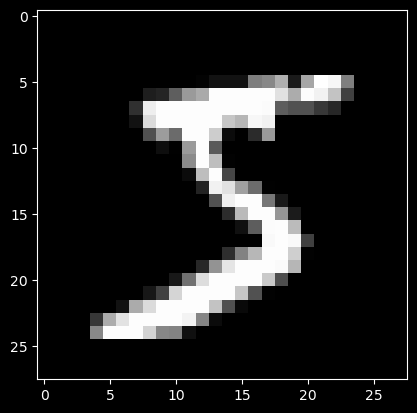

In [227]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

## `islice`

`islice` allows to slice into an iterator:

```
Init signature: islice(self, /, *args, **kwargs)
Docstring:     
islice(iterable, stop) --> islice object
islice(iterable, start, stop[, step]) --> islice object

Return an iterator whose next() method returns selected values from an
iterable.  If start is specified, will skip all preceding elements;
otherwise, start defaults to zero.  Step defaults to one.  If
specified as another value, step determines how many values are
skipped between successive calls.  Works like a slice() on a list
but returns an iterator.
```

Documentation: [islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [228]:
from itertools import islice

From a list `vals`, we create an iterator `it` and use it in `islice` to slice 5 values. `islice` returns a special object, which is also an iterator, but yielding only a subset of `it`'s elements, based on `start`, `stop`, and `step`.

In [229]:
print(vals)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]


In [230]:
it = iter(vals)
islice(it, 5)

Let's refresh `it`, and create the slided_it yielding the first 5 values:

In [231]:
it = iter(vals)
sliced_it = islice(it, 5)
for v in sliced_it:
    print(v)

0.0
0.0
0.0
0.19140625
0.9296875


If we try once more, it will fail as all 5 values were yielded

In [232]:
# next(sliced_it)

```ipython
    ---------------------------------------------------------------------------
    StopIteration                             Traceback (most recent call last)
    Input In [14], in <cell line: 1>()
    ----> 1 next(sliced_it)

    StopIteration: 
```

Let's refresh `it` again and get every second value in `vals` from 1 to 9

In [233]:
print(vals)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]


In [234]:
it = iter(vals)
sliced_it = islice(it, 1, 10, 2)
for v in sliced_it:
    print(v)

0.0
0.19140625
0.98828125
0.98828125
0.98828125


We also can use this to split a long list in chunks

In [235]:
it = iter(range(18))

In [236]:
list(islice(it, 5))

[0, 1, 2, 3, 4]

In [237]:
list(islice(it, 5))

[5, 6, 7, 8, 9]

In [238]:
list(islice(it, 5))

[10, 11, 12, 13, 14]

Now we have almost consumed the entire set of values in `vals`. Calling `list(islice(it,5)` again will yield a shorter list. Then an emtpy list

In [239]:
list(islice(it, 5))

[15, 16, 17]

In [240]:
list(islice(it, 5))

[]

We can use this for our image. It is currently a long list `lst1` with 784 pixel values. In fact it should be a square of 28 x 28, i.e. 28 sublists of 28 values each.

In [241]:
len(lst1)

784

`[0, 1, 2, 3, 4, 5, 6, ... 780, 781, 782, 783]`

into

`[[  0,   1,   2, ... ,  27],
  [ 28,  29,  30, ... ,  55],
  ...
  
  [755, 756, 757, ... , 783]]`
  
Each of the sublist is a successive slice of the long list. So we can have a compact single line of code to create it, using `iter` and `islice`

```
    it = iter(lst1)
    img = list(iter(lambda: list(islice(it, 28)), []))
```

```
    list(iter(...))
```
will create a list from an iterator which will yield each of the sublist:
```
    iter(lambda: list(islice(it, 28)), [])
```
The iterator is constructed from a callable returning a slice of the long list lst1


**`iter`**
```
Docstring:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
```

In [242]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

In [243]:
print(img[0])
print(img[1])
print(img[2])
print(img[27])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


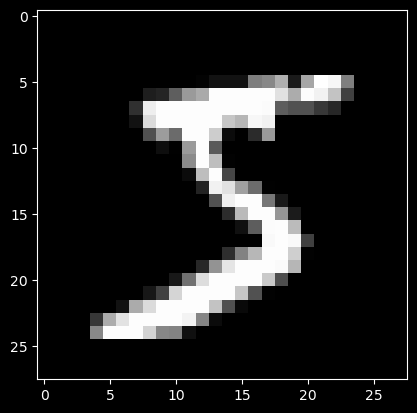

In [244]:
plt.imshow(img);

## Matrix and tensor

Our list of list `img` represents the image, but is a little cumbersome to use. For instance, it requires two indexing in cascade:

In [245]:
img[20][15]

0.98828125

What we want to use is a matrix form, which we can index as `img[i, j]`, like a matrix.

In python, the dunder method `__getitem__` is the method called to slice an object.

> From the [doc](https://docs.python.org/3/reference/datamodel.html):
>
> `object.__getitem__(self, key)`
>
> Called to implement evaluation of `self[key]`. 
>
> For sequence types, the accepted keys should be integers and slice objects.
>
> Note that the special interpretation of negative indexes (if the class wishes to emulate a sequence type) is up to the `__getitem__()` method. If key is of an inappropriate type, `TypeError` may be raised; if of a value outside the set of indexes for the sequence (after any special interpretation of negative values), `IndexError` should be raised. 
>
> For mapping types, if key is missing (not in the container), `KeyError` should be raised.
>
> Note for loops expect that an `IndexError` will be raised for illegal indexes to allow proper detection of the end of the sequence.
```

In our case, we want to able to call `matrix[i, j]` and get the matrix element at `i, j`. So the `__getitem__` method of our class Matrix should be return to do that from the list of list we have.

In [246]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [247]:
m = Matrix(img)
m[20,15], m[0,0]

(0.98828125, 0.0)

Now we have recreated a matrix from scratch, therefore we can use the equivalanet function in pytorch and numpy.

In [248]:
import torch
from torch import tensor

In [249]:
tensor([1,2,3])

tensor([1, 2, 3])

In [250]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.type()

'torch.FloatTensor'

In [251]:
x_train.shape

torch.Size([50000, 784])

[Tensor](https://pytorch.org/docs/stable/tensors.html)

We have a tensor with 50,000 flattened images with 784 pixels. We need to convert it into square images.

In [252]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

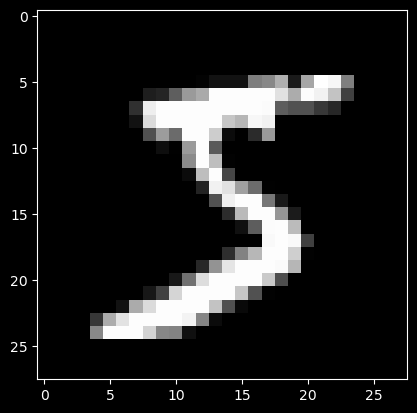

In [253]:
plt.imshow(imgs[0]);

In [254]:
imgs[0,20,15]

tensor(0.99)

In [255]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [256]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [257]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [258]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [259]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [260]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [261]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [262]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [263]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.93])
In child: tensor([0.93])


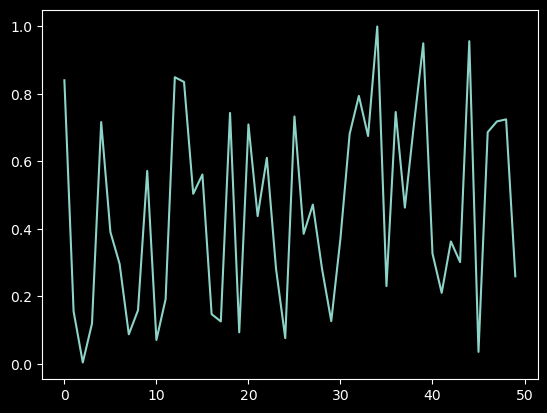

In [264]:
plt.plot([rand() for _ in range(50)]);

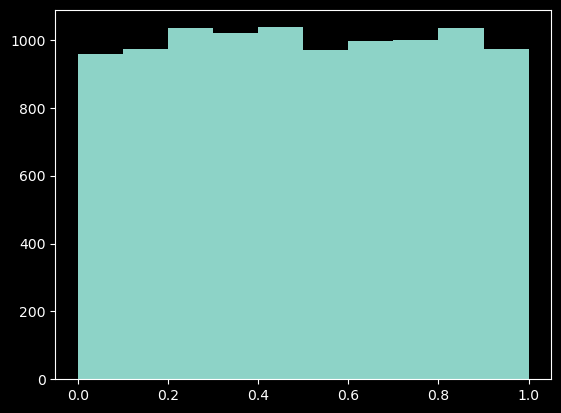

In [265]:
plt.hist([rand() for _ in range(10000)]);

In [266]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

4.47 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [267]:
%timeit -n 10 torch.randn(784,10)

60.3 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix multiplication

In [268]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [269]:
m1 = x_valid[:5]
m2 = weights

In [270]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [271]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [272]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

Most naive implementation of the MatMul: Loop through all each row in A and col in B and then the elements

$
\begin{bmatrix}
a_{1,1}  &a_{1,2}  &a_{1,3}  &...  &a_{1,ac} \\
a_{2,1}  &a_{2,2}  &a_{2,3}  &...  &a_{2,ac} \\
         &... \\
a_{ar,1} &a_{ar,2} &a_{ar,3} &...  &a_{ar,ac} \\
\end{bmatrix} \times
\begin{bmatrix}
b_{1,1} &b_{1,2} &... &b_{1,bc} \\
b_{2,1} &b_{2,2} &... &b_{2,bc} \\
b_{3,1} &b_{3,2} &... &b_{3,bc} \\
       &... \\
b_{br,1} &b_{br,2} &... &b_{br,bc} \\
\end{bmatrix} = 
\begin{bmatrix}
t_{1,1} &t_{1,2} &... &t_{1,bc} \\
t_{2,1} &t_{2,2} &... &t_{2,bc} \\
t_{3,1} &t_{3,2} &... &t_{3,bc} \\
       &... \\
t_{ar,1} &t_{ar,2} &... &t_{ar,bc} \\
\end{bmatrix}
$

In our case with the shapes of `a` and `b`

$
\begin{bmatrix}
a_{1,1}  &a_{1,2}  &a_{1,3}  &...  &a_{1,784} \\
a_{2,1}  &a_{2,2}  &a_{2,3}  &...  &a_{2,784} \\
         &... \\
a_{5,1}  &a_{5,2}  &a_{5,3} &...  &a_{5,784} \\
\end{bmatrix} \times
\begin{bmatrix}
b_{1,1} &b_{1,2} &... &b_{1,10} \\
b_{2,1} &b_{2,2} &... &b_{2,10} \\
b_{3,1} &b_{3,2} &... &b_{3,10} \\
       &... \\
b_{784,1} &b_{784,2} &... &b_{784,10} \\
\end{bmatrix} =
\begin{bmatrix}
t_{1,1} &t_{1,2} &... &t_{1,10} \\
t_{2,1} &t_{2,2} &... &t_{2,10} \\
t_{3,1} &t_{3,2} &... &t_{3,10} \\
       &... \\
t_{5,1} &t_{5,2} &... &t_{5,10} \\
\end{bmatrix}
$

In [273]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [274]:
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [275]:
t1.shape

torch.Size([5, 10])

In [276]:
import numpy as np
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
np.set_printoptions(precision=2, linewidth=140)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [277]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    assert ac == br, f"Shapes are not compatible"
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [278]:
%time _=matmul(m1, m2)

CPU times: user 629 ms, sys: 0 ns, total: 629 ms
Wall time: 628 ms


In [279]:
ar*bc*ac

39200

Very slow. Let's improve things step by step

## Numba

Numba takes a python function and transforms it into a compiled code, the first time it is used

In [280]:
from numba import njit

In [281]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [282]:
from numpy import array

In [283]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 64.6 ms, sys: 20.3 ms, total: 84.9 ms
Wall time: 84 ms


20.0

First time take awhile because it will compile it first. Then it goes mush faster.

In [284]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 41 µs


20.0

Now, we replace the inner loop running by the numba function `dot()`, so only two loops run in python and the inner one runs in numba.

In [285]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [286]:
m1a,m2a = m1.numpy(),m2.numpy()

In [287]:
from fastcore.test import *

In [288]:
test_close(t1,matmul(m1a, m2a))

In [289]:
%timeit -n 50 matmul(m1a,m2a)

359 µs ± 45 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise operations (ops)

[TryAPL](https://tryapl.org/)

In [290]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [291]:
a + b

tensor([12., 14.,  3.])

In [292]:
(a < b).float().mean()

tensor(0.67)

In [293]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste. This is the source LaTeX that I pasted to render the equation above:

```latex
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [294]:
sf = (m*m).sum()
sf

tensor(285.)

In [295]:
sf.sqrt()

tensor(16.88)

In [296]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [297]:
m[2]

tensor([7., 8., 9.])

Alternative approach to the numba function. Here we replace the python inner loop by an *elementwise operation*, which runs faster then python:
```python
for k in range(ac): # 784
    t1[i,j] += m1[i,k] * m2[k,j]
```

into

```python
c[i,j] = (a[i,:] * b[:,j]).sum()

```

In [298]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): 
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [299]:
test_close(t1,matmul(m1, m2))

In [300]:
%timeit -n 50 _=matmul(m1, m2)

910 µs ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [301]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [302]:
test_close(t1,matmul(m1, m2))

In [303]:
%timeit -n 50 _=matmul(m1, m2)

702 µs ± 58.6 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

### Broadcasting with a scalar

In [304]:
a

tensor([10.,  6., -4.])

In [305]:
a > 0

tensor([ True,  True, False])

How are we able to do `a > 0`?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [306]:
a + 1

tensor([11.,  7., -3.])

In [307]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [308]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix

Although broadcasting a scalar is an idea that dates back to APL, the more powerful idea of broadcasting across higher rank tensors [comes from](https://mail.python.org/pipermail/matrix-sig/1995-November/000143.html) a little known language called [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html).

We can also broadcast a vector to a matrix:

In [309]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [310]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [311]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [312]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [313]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

Interesting function to see what broadcast will do

In [314]:
t = c.expand_as(m)

In [315]:
c.expand_as?

Docstring:
expand_as(other) -> Tensor

Expand this tensor to the same size as :attr:`other`.
``self.expand_as(other)`` is equivalent to ``self.expand(other.size())``.

Please see :meth:`~Tensor.expand` for more information about ``expand``.

Args:
    other (:class:`torch.Tensor`): The result tensor has the same size
        as :attr:`other`.
Type:      builtin_function_or_method


In [316]:
m, t

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]))

In [317]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

Expanding the tensor to match another tensor size is like broacasting, if does not duplicate data. The storage in memory remains identical. These values are just used several times.

In [318]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 3]

**`Tensor.stride()`**

Stride is the jump necessary to go from one element to the next one in the specified dimension `dim`. A tuple of all strides is returned when no argument is passed in.

In [319]:
print(m)
m.shape, m.stride()

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


(torch.Size([3, 3]), (3, 1))

In [320]:
print(c)
print(t)
t.shape, t.stride()

tensor([10., 20., 30.])
tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])


(torch.Size([3, 3]), (0, 1))

`c` is expended into `t` to match `m`'s shape. But the strides of `m` and `t` are different in the dimension 0 (row). It is 3 for `m` because each row is different. It is  0 for `t` as we just repeat the same values / reuse the same space in memory !

`v` below cannot be broadcast to match `w` because there is no way to make there shape match.

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [ ]:
v = torch.tensor([1, 2])
w = torch.tensor([[1, 2, 3, 4, 5], [11, 22, 33, 44, 55], [111, 222, 333, 444, 555]])
v.shape, w.shape

(torch.Size([2]), torch.Size([3, 5]))

In [ ]:
# v.expand_as(w)

```ipython
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Input In [116], in <cell line: 1>()
----> 1 v.expand_as(w)

RuntimeError: The expanded size of the tensor (5) must match the existing size (2) at non-singleton dimension 1.  Target sizes: [3, 5].  Tensor sizes: [2]
```

In [ ]:
# w + v

```
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Input In [219], in <cell line: 1>()
----> 1 w + v

RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 1
```

**`unsqueeze()` and `None` slicing**

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [321]:
c

tensor([10., 20., 30.])

In [322]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [323]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [324]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [325]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [326]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

We can combine dimension increase and broadcast/expand

In [327]:
c, c.expand_as(m), c[None, :].expand_as(m)

(tensor([10., 20., 30.]),
 tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]),
 tensor([[10., 20., 30.],
         [10., 20., 30.],
         [10., 20., 30.]]))

In [328]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

The next cell does the same as the expand

In [329]:
print(m)
print(c)
print(c[:,None])
print(c[:,None].expand_as(m))
m + c[:,None].expand_as(m)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([10., 20., 30.])
tensor([[10.],
        [20.],
        [30.]])
tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])


tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [330]:
print(m)
print(c)
print(c[None, :])
m + c[None,:]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([10., 20., 30.])
tensor([[10., 20., 30.]])


tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [331]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [332]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

### Broadcasting Rules

In [ ]:
c[None,:]

tensor([[10., 20., 30.]])

In [ ]:
c[None,:].shape

torch.Size([1, 3])

In [ ]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[:,None].shape

torch.Size([3, 1])

This is doing an outerproduct

In [ ]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [ ]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [ ]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

**rules**

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

## Matmul with broadcasting

In [333]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [334]:
digit[:,None].shape

torch.Size([784, 1])

expand makes M1 the same shape as M2

In [336]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [338]:
# (digit[:,None]*m2).shape

In [339]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [340]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version with the loop on j
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version, skipping the loop on j
    return c

In [341]:
test_close(t1,matmul(m1, m2))

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

70.1 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Our time has gone from ~500ms to <0.1ms, an over 5000x improvement! We can run on the whole dataset now.

It is fast enough to handle all the images at once, and no longer a minibatch of 5

In [342]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [343]:
tr.shape

torch.Size([50000, 10])

In [ ]:
%time _=matmul(x_train, weights)

CPU times: user 6.59 s, sys: 200 ms, total: 6.79 s
Wall time: 663 ms


## Einstein summation

[Einstein summation](https://ajcr.net/Basic-guide-to-einsum/) ([`einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)) is a compact representation for combining products and sums in a general way. The key rules are:

- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed.

In [345]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [346]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [347]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [348]:
mr = torch.einsum('ik,kj->ij', m1, m2)
mr.shape

torch.Size([5, 10])

In [349]:
mr

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [350]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [351]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [ ]:
%timeit -n 5 _=matmul(x_train, weights)

15.1 ms ± 176 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [352]:
test_close(tr, x_train@weights, eps=1e-3)

In [ ]:
%timeit -n 5 _=torch.matmul(x_train, weights)

15.2 ms ± 96.2 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

Create a function that only gives the value of one single value of the multiplied matrix, defined by coordinates `grid`

In [353]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [354]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

kernel = function that can give a result on gpu ?????

In [355]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [356]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

Numba has a compiler to compile pyuthon into cuda code for NVidia

In [357]:
from numba import cuda

In [358]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

fcnt almost identical to the python function. Decorator compiles into cuda

In [359]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [360]:
r = np.zeros(tr.shape)
m1g,m2g,rg = cuda.to_device(x_train),cuda.to_device(weights),cuda.to_device(r)

m1g, m2g, rg = map(cuda.to_device, (x_train, weights, r))

In [361]:
r.shape

(50000, 10)

In [362]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

Now we launch the kernel

In [364]:
# launch the kernel on GPU
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)

# now must copy back to CPU to see results
r = rg.copy_to_host()

test_close(tr, r, eps=1e-3)

In [365]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

36.3 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


can even go faster by copying the dataset to the GPU, so no transfer delay time

In [366]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [369]:
%timeit -n 10 r=(m1c@m2c).cpu()

4.2 ms ± 675 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Our broadcasting version was >500ms, and our CUDA version is around 0.5ms, which is another 1000x improvement compared to broadcasting. So our total speedup is around 5 million times!